In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Cleaned loan.csv')

In [3]:
df.head()

,customer.id,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,pub.rec,inq.last.6mths,delinq.2yrs,paid.back.loan
0,LA001,Yes,debt_consolidation,11.89%,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,Less than 5,No,Yes
1,LA002,Yes,credit_card,10.71%,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,Less than 5,No,Yes
2,LA003,Yes,debt_consolidation,13.57%,366.86,10.373491,11.63,682,4710.000000,3511,25.6,0,Less than 5,No,Yes
3,LA004,Yes,debt_consolidation,10.08%,162.34,11.350407,8.10,712,2699.958333,33667,73.2,0,Less than 5,No,Yes
4,LA005,Yes,credit_card,14.26%,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,Less than 5,Yes,Yes


In [4]:
A = df[df['fico'].astype(float) > 700].shape[0]
print(A)

5357


In [5]:
B = df['purpose'].value_counts().debt_consolidation
print(B)

# B = len(df[df['purpose']=='debt_consolidation'])
#print(B)

3957


In [6]:
total = len(df)
print(total)

9578


In [7]:
p_of_a = A / total
print(p_of_a)

p_of_b = B / total
print(p_of_b)

0.5593025683858843
0.4131342660263103


In [8]:
df2 = df[df['purpose']=='debt_consolidation']

In [9]:
df1 = df[df['fico'].astype(float) > 700]

In [10]:
#Probability of fico score greater than 700, GIVEN that purpose == debt consolidation
p_a_b = df2[df2['fico'].astype(float) >700].shape[0]/df2.shape[0]
print(p_a_b)

0.489764973464746


In [11]:
#Probability of purpose == debt consolidation, given that fico score greater than 700, 
p_b_a = df1[df1['purpose']=='debt_consolidation'].shape[0]/df1.shape[0]
print(p_b_a)

0.36176964719059174


In [12]:
result = (p_a_b == p_of_a) #Not independent events but conditional probability
print(result)

False


In [13]:
#prob_lp = df['paid.back.loan'].value_counts().Yes / len(df) 
prob_lp = df[df['paid.back.loan']=='Yes'].shape[0]/df.shape[0]
print(prob_lp)

0.8399457089162664


In [14]:
#prob_cs = df['credit.policy'].value_counts().Yes / len(df)
prob_cs = df[df['credit.policy']=='Yes'].shape[0]/df.shape[0]
print(prob_cs)

0.8049697222802256


In [15]:
new_df = df[df['paid.back.loan']=='Yes']

In [16]:
#Probability for the event paid.back.loan == 'Yes' given credit.policy == 'Yes'
prob_cs_pd = df[df['credit.policy']=='Yes'].shape[0] / new_df.shape[0]
print(prob_cs_pd)

0.9583592293349906


In [17]:
numerator = prob_cs_pd * prob_lp
print(numerator)

0.8049697222802255


In [18]:
bayes = numerator / prob_cs
print(bayes)

0.9999999999999999


In [19]:
df3 = df[df['paid.back.loan'] == 'No']

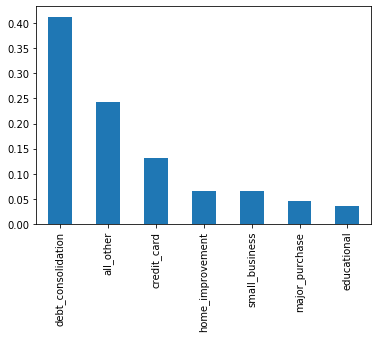

In [20]:
df.purpose.value_counts(normalize=True).plot(kind='bar')

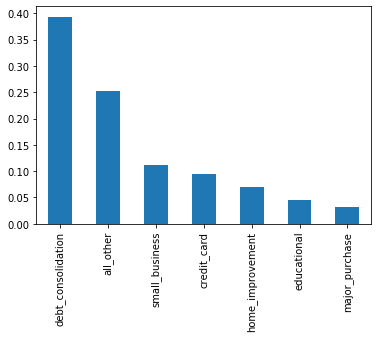

In [21]:
df3.purpose.value_counts(normalize=True).plot(kind='bar')

In [22]:
inst_median = df.installment.median()
print(inst_median)

268.95


In [23]:
inst_mean = df.installment.mean()
print(inst_mean)

319.08941323867265


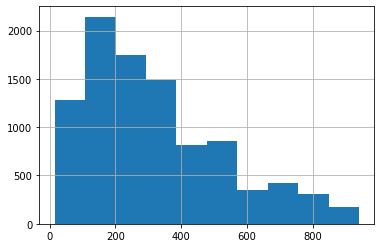

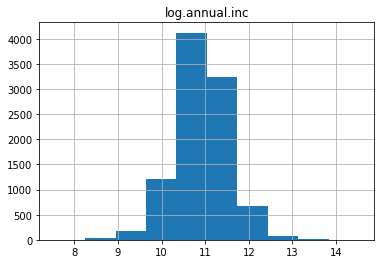

In [24]:
df.installment.hist(bins=10)
df.hist(column='log.annual.inc',bins=10)
plt.show()